In [2]:
!pip install selenium

     ---------------------------------------- 6.5/6.5 MB 608.8 kB/s eta 0:00:00
     ------------------------------------ 384.9/384.9 kB 648.3 kB/s eta 0:00:00
     -------------------------------------- 58.3/58.3 kB 510.8 kB/s eta 0:00:00


In [3]:
import selenium

In [8]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import getpass

In [ ]:
my_user = "VishalS39768006"
my_pass = getpass.getpass()

In [25]:
search_item = "artificial intelligence jobs"

In [19]:
from selenium import webdriver
from time import sleep

PATH = "C:\Program Files\drivers\chromedriver.exe"
driver = webdriver.Chrome(PATH)

driver.get("https://twitter.com/i/flow/login")
# driver.maximize_window()
sleep(3)

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_6796\620006778.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


In [20]:
user_id = driver.find_element(By.XPATH,"//input[@type='text']")
user_id.send_keys(my_user)
user_id.send_keys(Keys.ENTER)

In [21]:
password = driver.find_element(By.XPATH,"//input[@type='password']")
password.send_keys(my_pass)
password.send_keys(Keys.ENTER)


In [22]:
# # Scrape Tweets mentioning about artificial intelligence

In [27]:
search_box = driver.find_element(By.XPATH,"//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(search_item)
search_box.send_keys(Keys.ENTER)

In [28]:
# collecting twittes
all_tweets = set()


tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
while True:
    for tweet in tweets:
        all_tweets.add(tweet.text)
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    sleep(3)
    tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
    if len(all_tweets)>100:
        break

In [29]:
all_tweets = list(all_tweets)
all_tweets[0]


'Source  Visual Capitalist'

In [30]:
# # Cleaning the Tweets

In [31]:
import pandas as pd
pd.options.display.max_colwidth = 1000
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WELCOME\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WELCOME\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [35]:
import pandas as pd
pd.options.display.max_colwidth = 1000
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WELCOME\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WELCOME\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [37]:
stp_words = stopwords.words('english')
print(stp_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [38]:
df = pd.DataFrame(all_tweets,columns=['tweets'])
df.head()

,tweets
0,Source Visual Capitalist
1,Global labor markets are poised for a new era of turbulence as technologies like artificial intelligence accelerate the decline of clerical work.
2,"reading about IBM replacing ~8,000 jobs with Artificial Intelligence and remembering how there was no interest in the topic during the 2020 Democratic primary race"
3,"In this episode of the podcast, we sit down with Melvin Newman, co-founder of PataBid. Learn how PataBid is revolutionizing the way that contractors estimate and bid on jobs through the use of automation, artificial intelligence, and machine learning: https://hubs.ly/Q01NH6J40"
4,"Artificial intelligence has the power to automate at least some jobs, according to reports. ""Some jobs"" translates to 7,800 for IBM."


In [42]:
one_tweet=df.iloc[4]['tweets']
one_tweet

'Artificial intelligence has the power to automate at least some jobs, according to reports. "Some jobs" translates to 7,800 for IBM.'

In [86]:
!pip install textblob
!pip install wordcloud

In [45]:
def TweetCleaning(tweet):
    cleanTweet = re.sub(r"@[a-zA-Z0-9]+","",tweet)
    cleanTweet = re.sub(r"#[a-zA-Z0-9\s]+","",cleanTweet)
    cleanTweet = ' '.join(word for word in cleanTweet.split() if word not in stp_words)
    return cleanTweet

In [87]:
from textblob import TextBlob
from wordcloud import WordCloud

In [46]:
def calPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [47]:
def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

In [48]:
def segmentation(tweet):
    if tweet > 0:
        return "positive"
    if tweet == 0:
        return "neutral"
    else:
        return "negative"

In [49]:
df['cleanedTweets'] = df['tweets'].apply(TweetCleaning)
df['tPolarity'] = df['cleanedTweets'].apply(calPolarity)
df['tSubjectivity'] = df['cleanedTweets'].apply(calSubjectivity)
df['segmentation'] = df['tPolarity'].apply(segmentation)
df.head()

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
0,Source Visual Capitalist,Source Visual Capitalist,0.000000,0.000000,neutral
1,Global labor markets are poised for a new era of turbulence as technologies like artificial intelligence accelerate the decline of clerical work.,Global labor markets poised new era turbulence technologies like artificial intelligence accelerate decline clerical work.,-0.154545,0.484848,negative
2,"reading about IBM replacing ~8,000 jobs with Artificial Intelligence and remembering how there was no interest in the topic during the 2020 Democratic primary race","reading IBM replacing ~8,000 jobs Artificial Intelligence remembering interest topic 2020 Democratic primary race",-0.100000,0.750000,negative
3,"In this episode of the podcast, we sit down with Melvin Newman, co-founder of PataBid. Learn how PataBid is revolutionizing the way that contractors estimate and bid on jobs through the use of automation, artificial intelligence, and machine learning: https://hubs.ly/Q01NH6J40","In episode podcast, sit Melvin Newman, co-founder PataBid. Learn PataBid revolutionizing way contractors estimate bid jobs use automation, artificial intelligence, machine learning: https://hubs.ly/Q01NH6J40",-0.600000,1.000000,negative
4,"Artificial intelligence has the power to automate at least some jobs, according to reports. ""Some jobs"" translates to 7,800 for IBM.","Artificial intelligence power automate least jobs, according reports. ""Some jobs"" translates 7,800 IBM.",-0.450000,0.700000,negative


In [50]:
# # Analysis and Visualization

In [51]:
df.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})


,segmentation
segmentation,
negative,61
neutral,16
positive,25


In [52]:
# top 3 most negative
df.sort_values(by=['tPolarity'],ascending=True).head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
65,"IBM Could Replace 7,800 Jobs With Artificial Intelligence, CEO Says","IBM Could Replace 7,800 Jobs With Artificial Intelligence, CEO Says",-0.6,1.0,negative
94,"Artificial intelligence (AI) chatbot system ChatGPT is generating poems, articles and songs... - https://cbn.co.za/industry-news/digital-transformation-information-technology/will-chatgpt-replace-our-jobs/… #artificialintelligence #ChatGPT #creatives #data #internet #digitaltransformation #informationtechnology","Artificial intelligence (AI) chatbot system ChatGPT generating poems, articles songs... - https://cbn.co.za/industry-news/digital-transformation-information-technology/will-chatgpt-replace-our-jobs/…",-0.6,1.0,negative
86,"IBM just laid off 30,000 workers as their jobs will be done by Artificial Intelligence. US will not come to any harm from India or Indian workers.","IBM laid 30,000 workers jobs done Artificial Intelligence. US come harm India Indian workers.",-0.6,1.0,negative


In [54]:
# 3 neutral
df[df.tPolarity==0].head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
0,Source Visual Capitalist,Source Visual Capitalist,0.0,0.0,neutral
5,Which jobs are most at risk from AI? https://bbc.in/3nm7Oku,Which jobs risk AI? https://bbc.in/3nm7Oku,0.0,0.0,neutral
8,How to spot a scam when searching for a job | FOX43 FindsOut - WPMT FOX 43,How spot scam searching job | FOX43 FindsOut - WPMT FOX 43,0.0,0.0,neutral


In [55]:
# top 3 most positive
df.sort_values(by=['tPolarity'],ascending=False).head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
16,"Featuring career talks, a career expo, and more, here are a few ways that you can supercharge your job search at ODSC East this May. #DataScience #ArtificialIntelligence","Featuring career talks, career expo, more, ways supercharge job search ODSC East May.",0.5,0.50,positive
28,"Un artículo muy relevante para reflexionar (Tb' educadore/as): ""Which Jobs Will Be Most Impacted by ChatGPT?"" #odite \n@EspiralOdite\n @xsune\n @caminologa\n @nsabate4\n @caotico27\n @jplanasga\n @francescnadal\n @ciberespiral\n @NewsNeus\n @igrezan\n @LastrarotH\n @Merce_G","Un artículo muy relevante para reflexionar (Tb' educadore/as): ""Which Jobs Will Be Most Impacted ChatGPT?"" _G",0.5,0.50,positive
92,"#NewToolAlert Check out Chadview, the AI-powered real-time meetings assistant, now available on #AiTopTools! Prepare for job interviews, sales calls & more. Get the details: https://aitoptools.com/tool/chadview/ #ArtificialIntelligence #AI",", AI-powered real-time meetings assistant, available ! Prepare job interviews, sales calls & more. Get details: https://aitoptools.com/tool/chadview/",0.5,0.45,positive


In [56]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [64]:
consolidated = ' '.join(word for word in df['cleanedTweets'])

In [77]:
wordCloud = WordCloud(width=500, height=666, random_state=15, max_font_size=119,).generate(consolidated)

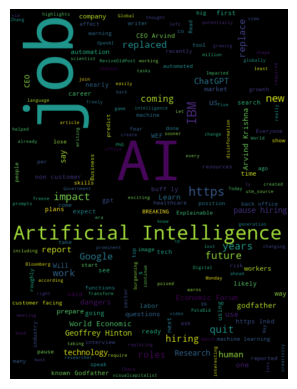

In [78]:
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [79]:
import seaborn as sns

In [80]:
df.groupby('segmentation').count()

,tweets,cleanedTweets,tPolarity,tSubjectivity
segmentation,,,,
negative,61,61,61,61
neutral,16,16,16,16
positive,25,25,25,25


<Axes: xlabel='tPolarity', ylabel='tSubjectivity'>

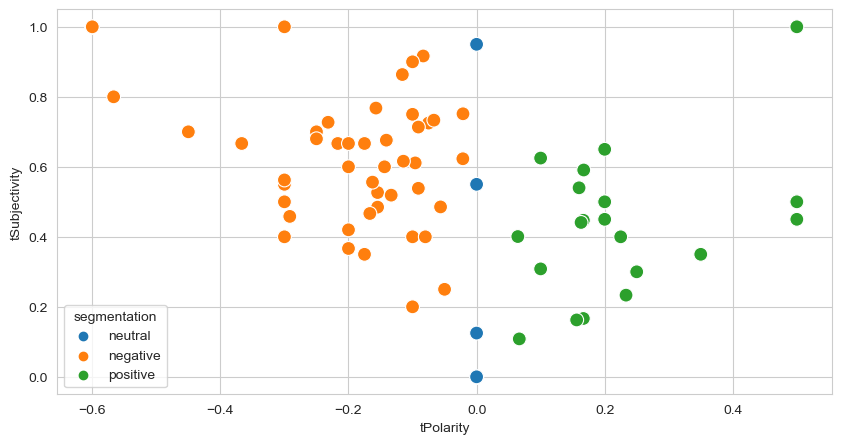

In [81]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.scatterplot(data=df, x='tPolarity',y='tSubjectivity',s=100,hue='segmentation')

<Axes: xlabel='segmentation', ylabel='count'>

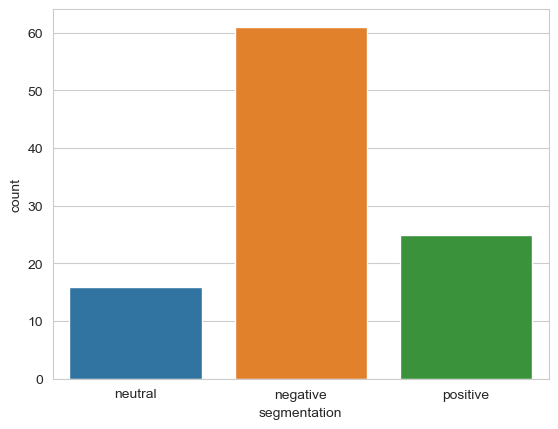

In [82]:
sns.countplot(data=df,x='segmentation')

In [85]:

positive = round(len(df[df.segmentation == 'positive'])/len(df)*100,1)
negative = round(len(df[df.segmentation == 'negative'])/len(df)*100,1)
neutral = round(len(df[df.segmentation == 'neutral'])/len(df)*100,1)

responses = [positive, negative, neutral]
responses

response = {'resp': ['Excited', 'Afraid', 'Confused'], 'pct':[positive, negative, neutral]}
pd.DataFrame(response)

,resp,pct
0,Excited,24.5
1,Afraid,59.8
2,Confused,15.7
